<a href="https://colab.research.google.com/github/nihalnihalani/CS497-Deep-Learning-Github/blob/master/Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#It takes more RAM >16 GB so run it using pro
import tensorflow as tf

In [ ]:
print(tf.__version__)

In [ ]:
!pip install keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [ ]:
!pip install tqdm
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 13.93 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [ ]:
train = pd.read_csv("/content/Movies-Poster_Dataset/train.csv")

In [ ]:
train.shape[0]

7254

In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/Movies-Poster_Dataset/Images/'+train['Id'][i]+'.jpg',target_size=(250,250,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

X.shape

100%|██████████| 7254/7254 [00:20<00:00, 356.50it/s]


(7254, 250, 250, 3)

In [ ]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape


(7254, 25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(250,250,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
102/102 [==============================] - 6s 56ms/step - loss: 0.3804 - accuracy: 0.1420 - val_loss: 0.2612 - val_accuracy: 0.1970
Epoch 2/10
102/102 [==============================] - 6s 54ms/step - loss: 0.2813 - accuracy: 0.2054 - val_loss: 0.2489 - val_accuracy: 0.1970
Epoch 3/10
102/102 [==============================] - 6s 55ms/step - loss: 0.2667 - accuracy: 0.2148 - val_loss: 0.2452 - val_accuracy: 0.1970
Epoch 4/10
102/102 [==============================] - 6s 54ms/step - loss: 0.2609 - accuracy: 0.2134 - val_loss: 0.2424 - val_accuracy: 0.1970
Epoch 5/10
102/102 [==============================] - 6s 55ms/step - loss: 0.2558 - accuracy: 0.2195 - val_loss: 0.2452 - val_accuracy: 0.1970
Epoch 6/10
102/102 [==============================] - 6s 54ms/step - loss: 0.2536 - accuracy: 0.2374 - val_loss: 0.2457 - val_accuracy: 0.1970
Epoch 7/10
102/102 [==============================] - 6s 54ms/step - loss: 0.2511 - accuracy: 0.2494 - val_loss: 0.2470 - val_accuracy: 0.1970

In [ ]:
# model.save('movie.h5',save_format="h5")
!ls Movies-Poster_Dataset/

endgame.jpg  fast.jpg  Images  saaho.jpg  train.csv


In [ ]:
img = image.load_img('/content/Movies-Poster_Dataset/saaho.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama (0.523)
Action (0.289)
Thriller (0.25)


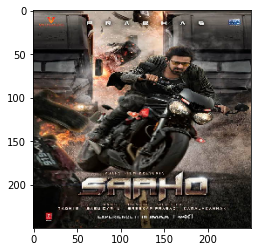

In [ ]:
print(train.columns[2:])
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [ ]:
model.save("/content/my_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/my_model/assets


In [ ]:
model.save("/content/my_h5_model.h5")